<a href="https://colab.research.google.com/github/Aashutosh-Basnet/Machine-Learning-Algorithms/blob/main/logistic_regression/binary_class/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [194]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [195]:
df = pd.concat([df_train, df_test])

In [196]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [197]:
columns = df.columns
print(columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [198]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'])

In [199]:
df['Cabin'].isnull().sum()

1014

In [200]:
df.shape

(1309, 9)

In [201]:
df = df.drop(columns=['Cabin'])

In [202]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


In [203]:
df.isnull().sum()

,0
Survived,418
Pclass,0
Sex,0
Age,263
SibSp,0
Parch,0
Fare,1
Embarked,2


In [204]:
df = df.dropna(subset=['Survived'])
df = df.dropna(subset=['Age'])
df = df.dropna(subset=['Embarked'])
df = df.dropna(subset=['Fare'])

In [205]:
!pip install category_encoders

In [208]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

encoder = ce.OrdinalEncoder(cols=['Sex'])
sex_df = encoder.fit_transform(df[['Sex']])

encoder = LabelEncoder()
emb = encoder.fit_transform(df[['Embarked']])

print(emb)
print(emb.shape)
print(df.shape)


[2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 0 2 0 2 2 2 0 2 2 0 1 2 2
 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 0 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 1 2 0 2 2 0 2 2 0 2 2 0 2 2 2 2 0 2 2 2 0
 2 2 1 2 2 2 2 2 2 2 2 2 2 0 1 2 2 2 2 2 2 2 2 2 2 1 2 2 0 2 0 2 2 2 2 2 2
 1 2 2 2 2 2 0 0 2 2 2 2 0 2 2 2 0 1 0 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 1 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 1 2 1 2 2 2 0 2 2 2 1 2 0 0 2 2 0 2 0 2 2 0 0 0 0 0 2 2 2 2 2 2 2 0 2 2 1
 2 0 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 0 2 2 0 0 0 2
 2 0 2 2 0 0 2 0 0 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 2 2 2 2 2
 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 0 2 0 2 2 2 1 2 2 0 2 2 2 1 2
 0 2 2 2 2 2 2 2 0 1 2 2 2 2 0 2 2 2 0 0 2 2 2 2 0 2 2 2 2 0 2 0 2 2 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 0 2 2 0 2 2 2 0 2
 2 2 2 2 2 2 2 0 2 0 2 2 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [209]:

df = pd.concat([df.drop(columns = ['Sex']), pd.DataFrame(emb, columns=['Embarked_Encoded']), sex_df], axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Embarked_Encoded,Sex
0,0.0,3.0,22.0,1.0,0.0,7.2500,S,2.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,C,0.0,2.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,S,2.0,2.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,S,2.0,2.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,S,2.0,1.0


In [210]:
df = df.drop(columns = ['Embarked'])


In [211]:
columns = df.columns
print(columns)
print(df.head())

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Encoded', 'Sex'],
      dtype='object')
   Survived  Pclass   Age  SibSp  Parch     Fare  Embarked_Encoded  Sex
0       0.0     3.0  22.0    1.0    0.0   7.2500               2.0  1.0
1       1.0     1.0  38.0    1.0    0.0  71.2833               0.0  2.0
2       1.0     3.0  26.0    0.0    0.0   7.9250               2.0  2.0
3       1.0     1.0  35.0    1.0    0.0  53.1000               2.0  2.0
4       0.0     3.0  35.0    0.0    0.0   8.0500               2.0  1.0


In [215]:
df = df.dropna()

X = df.drop(columns=['Survived'])
y = df['Survived']

In [216]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [217]:
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [218]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report (precision, recall, F1-score)
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 77.88%
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83        72
         1.0       0.71      0.66      0.68        41

    accuracy                           0.78       113
   macro avg       0.76      0.75      0.76       113
weighted avg       0.78      0.78      0.78       113

[[61 11]
 [14 27]]


In [219]:
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Model Coefficients: [[-1.17185403e+00 -3.27378157e-02 -3.78587483e-01 -8.13101896e-02
   1.04658652e-03  2.90246385e-01  2.50168877e+00]]
Intercept: [-0.57918378]


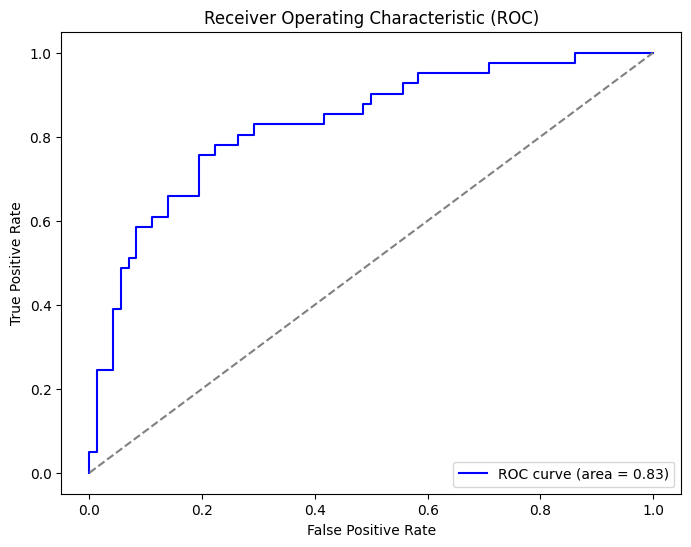

In [220]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()